In [1]:
from utz import *

In [2]:
from nj_crashes.sri.sri import get_sris
sris = get_sris()
len(sris)

34479

In [3]:
%%time
from njdot.data import START_YEAR, END_YEAR
c = concat([
    read_parquet(f'data/{year}/NewJersey{year}Accidents.pqt')
    for year in range(START_YEAR, END_YEAR)
])
c

CPU times: user 6.82 s, sys: 1.23 s, total: 8.04 s
Wall time: 6.04 s


,County Code,Municipality Code,Department Case Number,County Name,Municipality Name,Police Department Code,Police Department,Police Station,Total Killed,Total Injured,Pedestrians Killed,Pedestrians Injured,Severity,Intersection,Alcohol Involved,HazMat Involved,Crash Type Code,Total Vehicles Involved,Crash Location,Location Direction,Route,Route Suffix,SRI (Standard Route Identifier),Mile Post,Road System,Road Character,Road Surface Type,Surface Condition,Light Condition,Environmental Condition,Road Divided By,Temporary Traffic Control Zone,Distance To Cross Street,Unit Of Measurement,Direction From Cross Street,Cross Street Name,Is Ramp,Ramp To/From Route Name,Ramp To/From Route Direction,Posted Speed,Posted Speed Cross Street,Latitude,Longitude,Cell Phone In Use Flag,Other Property Damage,Reporting Badge No.,Date,Road Horizontal Alignment,Road Grade,First Harmful Event
0,01,01,#2001-17846,ATLANTIC,ABSECON CITY,01,ABSECON CITY,MUNICIPAL COMP?,0,0,0,0,P,B,False,False,03,2,CALDERON AVENUE,,,,,NaN,07,02,02,01,06,01,05,01,100,FE,N,RT 30,,,,25,,NaN,NaN,N,NEVER SAW V-1 MINOR DAMAGE - NO INJURIES REPOR...,830,2001-12-21 18:34:00,NaN,NaN,NaN
1,01,01,01-00029,ATLANTIC,ABSECON CITY,1,ABSECON,,0,0,0,0,P,B,False,False,06,2,RITZ DRIVE,,,,,NaN,07,01,02,03,06,01,05,01,,,,,,,,25,,NaN,NaN,N,,836,2001-01-01 09:30:00,NaN,NaN,NaN
2,01,01,01-004615,ATLANTIC,ABSECON CITY,1,ABSECON,,0,4,0,0,I,I,False,False,03,2,MORTON AVENUE,,,,,NaN,07,01,02,01,01,01,05,01,,AT,,NEW YORK AVENUE,,,,25,,NaN,NaN,N,,836,2001-04-10 14:44:00,NaN,NaN,NaN
3,01,01,01-004880,ATLANTIC,ABSECON CITY,1,ABSECON,,0,1,0,0,I,B,False,False,01,2,RT 30,,30,,00000030__,51.10,02,01,02,01,01,01,05,01,,,,,,,,45,,NaN,NaN,N,WITNESS-PETRIA GIBSON AND ANGELO HERSH,886,2001-04-15 13:56:00,NaN,NaN,NaN
4,01,01,01-004912,ATLANTIC,ABSECON CITY,1,ABSECON,,0,0,0,0,P,I,False,False,01,2,CR 651,,651,,,NaN,05,02,02,02,01,02,05,01,,AT,,CR 630,,,,35,,NaN,NaN,N,*BETH VEHICLES-RELIANCE INSURANCE CO.(215)864-...,836,2001-04-16 10:29:00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226953,21,23,B150-2021-00117A,WARREN,WHITE TWP,02,NEW JERSEY STATE POLICE,WASHINGTON - SQ,0,0,0,0,P,I,False,False,11,1,WARREN COUNTY 620,N,620,,21000620__,0.00,05,,02,01,06,01,05,01,,AT,,ROUTE 519 / S BRIDGEVILLE RD,,,,50,50,40.80707,75.07559,N,Damage to 10ft of Country road guardrail.,7837,2021-05-26 21:08:00,02,04,46
226954,21,23,B150-2021-00118A,WARREN,WHITE TWP,02,NEW JERSEY STATE POLICE,WASHINGTON - SQ,0,0,0,0,P,I,False,False,01,2,MANUNKA CHUNK RD / UPPER SEREPTA RD **,W,,,21231034__,1.73,07,,02,01,01,01,05,01,,AT,,MASSENATTS RD,,,,40,50,40.84466,75.05549,N,,8610,2021-05-25 07:26:00,01,04,26
226955,21,23,B150-2021-00128A,WARREN,WHITE TWP,02,NEW JERSEY STATE POLICE,WASHINGTON - SQ,0,0,0,0,P,B,False,False,12,1,ROUTE 519,S,519,,00000519__,44.00,05,,02,02,05,04,05,01,,,,,,,,50,,40.80564,75.07627,N,,8514,2021-06-03 20:17:00,03,04,24
226956,21,23,B150-2021-00130A,WARREN,WHITE TWP,02,NEW JERSEY STATE POLICE,WASHINGTON - SQ,0,0,0,0,P,B,False,False,12,1,US 46,E,46,,00000046__,7.50,02,,02,01,07,01,05,01,,,,,,,,50,,40.84149,75.04968,N,,8365,2021-06-06 00:00:00,01,04,24


In [4]:
c['County Name'].value_counts()

BERGEN        656350
ESSEX         610767
MIDDLESEX     606975
UNION         425445
HUDSON        424523
MONMOUTH      416092
PASSAIC       390426
OCEAN         340102
MORRIS        325609
CAMDEN        324947
MERCER        271333
BURLINGTON    264893
SOMERSET      237074
ATLANTIC      192238
GLOUCESTER    155854
CUMBERLAND     98515
HUNTERDON      83811
SUSSEX         78639
WARREN         71432
CAPE MAY       65356
SALEM          36922
Name: County Name, dtype: int64

In [5]:
%%time
nan_counts = c.isna().sum(axis=0)
nan_counts[nan_counts > 0]

CPU times: user 15.7 s, sys: 604 ms, total: 16.3 s
Wall time: 16.7 s


Mile Post                    2367547
Latitude                     4821948
Longitude                    4821948
Road Horizontal Alignment    4809915
Road Grade                   4809915
First Harmful Event          4809915
dtype: int64

In [6]:
y = c.Date.dt.year.rename('Year')

In [7]:
missing_mp = c['Mile Post'].isna().rename('missing_mp')
no_mp = c[missing_mp]
yes_mp = c[~missing_mp]
no_mp

,County Code,Municipality Code,Department Case Number,County Name,Municipality Name,Police Department Code,Police Department,Police Station,Total Killed,Total Injured,Pedestrians Killed,Pedestrians Injured,Severity,Intersection,Alcohol Involved,HazMat Involved,Crash Type Code,Total Vehicles Involved,Crash Location,Location Direction,Route,Route Suffix,SRI (Standard Route Identifier),Mile Post,Road System,Road Character,Road Surface Type,Surface Condition,Light Condition,Environmental Condition,Road Divided By,Temporary Traffic Control Zone,Distance To Cross Street,Unit Of Measurement,Direction From Cross Street,Cross Street Name,Is Ramp,Ramp To/From Route Name,Ramp To/From Route Direction,Posted Speed,Posted Speed Cross Street,Latitude,Longitude,Cell Phone In Use Flag,Other Property Damage,Reporting Badge No.,Date,Road Horizontal Alignment,Road Grade,First Harmful Event
0,01,01,#2001-17846,ATLANTIC,ABSECON CITY,01,ABSECON CITY,MUNICIPAL COMP?,0,0,0,0,P,B,False,False,03,2,CALDERON AVENUE,,,,,NaN,07,02,02,01,06,01,05,01,100,FE,N,RT 30,,,,25,,NaN,NaN,N,NEVER SAW V-1 MINOR DAMAGE - NO INJURIES REPOR...,830,2001-12-21 18:34:00,NaN,NaN,NaN
1,01,01,01-00029,ATLANTIC,ABSECON CITY,1,ABSECON,,0,0,0,0,P,B,False,False,06,2,RITZ DRIVE,,,,,NaN,07,01,02,03,06,01,05,01,,,,,,,,25,,NaN,NaN,N,,836,2001-01-01 09:30:00,NaN,NaN,NaN
2,01,01,01-004615,ATLANTIC,ABSECON CITY,1,ABSECON,,0,4,0,0,I,I,False,False,03,2,MORTON AVENUE,,,,,NaN,07,01,02,01,01,01,05,01,,AT,,NEW YORK AVENUE,,,,25,,NaN,NaN,N,,836,2001-04-10 14:44:00,NaN,NaN,NaN
4,01,01,01-004912,ATLANTIC,ABSECON CITY,1,ABSECON,,0,0,0,0,P,I,False,False,01,2,CR 651,,651,,,NaN,05,02,02,02,01,02,05,01,,AT,,CR 630,,,,35,,NaN,NaN,N,*BETH VEHICLES-RELIANCE INSURANCE CO.(215)864-...,836,2001-04-16 10:29:00,NaN,NaN,NaN
7,01,01,01-007162,ATLANTIC,ABSECON CITY,1,ABSECON,,0,1,0,1,I,B,False,False,13,1,CONNECTICUT AVENUE,,,,,NaN,07,01,02,01,01,01,05,01,75,FE,W,IRELAN AVENUE,,,,25,,NaN,NaN,N,NONE,836,2001-06-05 14:41:00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226934,21,23,B150-2021-00038A,WARREN,WHITE TWP,02,NEW JERSEY STATE POLICE,WASHINGTON - SQ,0,0,0,0,P,B,False,False,06,2,472 US HIGHWAY 46 HW,W,,,,NaN,09,,03,02,05,03,05,01,,,,,,,,50,,40.84022,75.03218,N,,8518,2021-02-06 09:59:00,01,04,28
226940,21,23,B150-2021-00073A,WARREN,WHITE TWP,02,NEW JERSEY STATE POLICE,WASHINGTON - SQ,0,0,0,0,P,B,False,False,06,2,COUNTY RD,W,,,,NaN,09,,02,01,01,01,05,01,,,,,,,,5,,40.81220,75.04940,N,,8543,2021-03-29 12:42:00,01,04,26
226941,21,23,B150-2021-00074A,WARREN,WHITE TWP,02,NEW JERSEY STATE POLICE,WASHINGTON - SQ,0,0,0,0,P,B,False,False,03,2,RIDGE RD,W,,,,NaN,07,,02,01,01,01,05,01,,,,,,,,25,,40.74680,75.13740,N,,8514,2021-03-29 18:23:00,03,05,26
226946,21,23,B150-2021-00087A,WARREN,WHITE TWP,02,NEW JERSEY STATE POLICE,WASHINGTON - SQ,0,0,0,0,P,B,False,False,08,2,QUICK CHECK NA,W,,,,NaN,09,,02,01,01,01,02,01,,,,,,,,,,40.83747,75.02612,N,BOAT TOWED BY V2 SUSTAINED MODERATE DAMAGE TO ...,8518,2021-04-26 05:42:00,01,04,26


In [8]:
empty_mp = c['Mile Post'] == ''
empty_mp.sum()

0

In [9]:
missing_ll = (c['Latitude'].isna() | c['Longitude'].isna()).rename('missing_ll')

In [10]:
cyms = (
    c
    .groupby(['County Name', y, missing_mp, missing_ll])
    .size()
    .rename('# Crashes')
    .reset_index(level=[2, 3])
)
cyms

missing_mp  missing_ll  # Crashes
County Name Year                                   
ATLANTIC    2001       False        True       4797
            2001        True        True       4942
            2002       False        True       5338
            2002        True        True       4403
            2003       False       False         34
...                      ...         ...        ...
WARREN      2020        True        True        121
            2021       False       False        874
            2021       False        True       1593
            2021        True       False        102
            2021        True        True        158

[1294 rows x 3 columns]

In [11]:
cym_by_missing = cyms.pivot(columns=['missing_mp', 'missing_ll'], values='# Crashes').fillna(0)

cym_by_missing.columns = [
    f'{"!mp" if mmp else "mp"} {"!ll" if mll else "ll"}'
    for mmp, mll in cym_by_missing.columns
]

cym_by_missing[ 'mp'] = cym_by_missing[ 'mp ll'] + cym_by_missing[ 'mp !ll']
cym_by_missing['!mp'] = cym_by_missing['!mp ll'] + cym_by_missing['!mp !ll']
cym_by_missing[ 'll'] = cym_by_missing[ 'mp ll'] + cym_by_missing[ '!mp ll']
cym_by_missing['!ll'] = cym_by_missing['mp !ll'] + cym_by_missing['!mp !ll']
total = cym_by_missing['mp'] + cym_by_missing['!mp']
assert (total == cym_by_missing['ll'] + cym_by_missing['!ll']).all()
cym_by_missing

mp !ll  !mp !ll   mp ll  !mp ll      mp     !mp      ll  \
County Name Year                                                            
ATLANTIC    2001  4797.0   4942.0     0.0     0.0  4797.0  4942.0     0.0   
            2002  5338.0   4403.0     0.0     0.0  5338.0  4403.0     0.0   
            2003  7321.0   2949.0    34.0     0.0  7355.0  2949.0    34.0   
            2004  7592.0   3223.0    35.0     0.0  7627.0  3223.0    35.0   
            2005  7268.0   3188.0    52.0     0.0  7320.0  3188.0    52.0   
...                  ...      ...     ...     ...     ...     ...     ...   
WARREN      2017   882.0    548.0  1306.0   405.0  2188.0   953.0  1711.0   
            2018  1380.0    712.0  1206.0   222.0  2586.0   934.0  1428.0   
            2019  1512.0    500.0  1193.0   168.0  2705.0   668.0  1361.0   
            2020  1493.0    121.0   926.0   138.0  2419.0   259.0  1064.0   
            2021  1593.0    158.0   874.0   102.0  2467.0   260.0   976.0   

                      !ll  
County Name Year           
ATLANTIC    2001   9739.0  
            2002   9741.0  
            2003  10270.0  
            2004  10815.0  
            2005  10456.0  
...                   ...  
WARREN      2017   1430.0  
            2018   2092.0  
            2019   2012.0  
            2020   1614.0  
            2021   1751.0  

[441 rows x 8 columns]

In [12]:
cym_by_missing['!mp ll'] / total

County Name  Year
ATLANTIC     2001    0.000000
             2002    0.000000
             2003    0.000000
             2004    0.000000
             2005    0.000000
                       ...   
WARREN       2017    0.128940
             2018    0.063068
             2019    0.049807
             2020    0.051531
             2021    0.037404
Length: 441, dtype: float64

In [13]:
missing_ll.sum(), (~missing_ll).sum()

(4821948, 1255355)

In [14]:
(c['Latitude'] == '').sum(), (c['Longitude'] == '').sum()

(0, 0)

In [15]:
def compute_missing_pct(s, name=None, pct_name=None):
    if name:
        s = s.rename(name)
    else:
        if not s.name:
            raise ValueError('Pass name kwarg or give series a name')
        name = s.name
    pct_name = pct_name or f'% {name}'
    cyms = (
        c
        .groupby(['County Name', y, s])
        .size()
        .rename('# Crashes')
        .reset_index(level=2)
    )
    cym_by_missing = cyms.pivot(columns=name, values='# Crashes')
    cy_num_crashes = cym_by_missing.sum(axis=1).rename('# Crashes')
    cy_missing_pct = (
        cym_by_missing
        .apply(lambda r: r[True] / r.sum(), axis=1)
        .rename(pct_name)
    )

    cy_stats = sxs(
        cy_missing_pct,
        cy_num_crashes,
    ).reset_index()
    return cy_stats

In [16]:
mmp = compute_missing_pct(missing_mp, pct_name='% Missing MP')
mmp

,County Name,Year,% Missing MP,# Crashes
0,ATLANTIC,2001,0.507444,9739
1,ATLANTIC,2002,0.452007,9741
2,ATLANTIC,2003,0.286200,10304
3,ATLANTIC,2004,0.297051,10850
4,ATLANTIC,2005,0.303388,10508
...,...,...,...,...
436,WARREN,2017,0.303407,3141
437,WARREN,2018,0.265341,3520
438,WARREN,2019,0.198043,3373
439,WARREN,2020,0.096714,2678


In [17]:
mll = compute_missing_pct(missing_ll, pct_name='% Missing LL')
mll

,County Name,Year,% Missing LL,# Crashes
0,ATLANTIC,2001,1.000000,9739.0
1,ATLANTIC,2002,1.000000,9741.0
2,ATLANTIC,2003,0.996700,10304.0
3,ATLANTIC,2004,0.996774,10850.0
4,ATLANTIC,2005,0.995051,10508.0
...,...,...,...,...
436,WARREN,2017,0.455269,3141.0
437,WARREN,2018,0.594318,3520.0
438,WARREN,2019,0.596502,3373.0
439,WARREN,2020,0.602689,2678.0


In [18]:
ll_no_mp = compute_missing_pct(missing_mp & ~missing_ll, name='ll_no_mp', pct_name='% has LL, no MP').fillna(0)
ll_no_mp

,County Name,Year,"% has LL, no MP",# Crashes
0,ATLANTIC,2001,0.000000,9739.0
1,ATLANTIC,2002,0.000000,9741.0
2,ATLANTIC,2003,0.000000,10304.0
3,ATLANTIC,2004,0.000000,10850.0
4,ATLANTIC,2005,0.000000,10508.0
...,...,...,...,...
436,WARREN,2017,0.128940,3141.0
437,WARREN,2018,0.063068,3520.0
438,WARREN,2019,0.049807,3373.0
439,WARREN,2020,0.051531,2678.0


In [19]:
ll_or_mp = compute_missing_pct(~missing_mp | ~missing_ll, name='ll_or_mp', pct_name='% has LL or MP')
ll_or_mp

,County Name,Year,% has LL or MP,# Crashes
0,ATLANTIC,2001,0.492556,9739
1,ATLANTIC,2002,0.547993,9741
2,ATLANTIC,2003,0.713800,10304
3,ATLANTIC,2004,0.702949,10850
4,ATLANTIC,2005,0.696612,10508
...,...,...,...,...
436,WARREN,2017,0.825533,3141
437,WARREN,2018,0.797727,3520
438,WARREN,2019,0.851764,3373
439,WARREN,2020,0.954817,2678


In [20]:
import plotly.express as px
from nj_crashes.utils import show, interactive

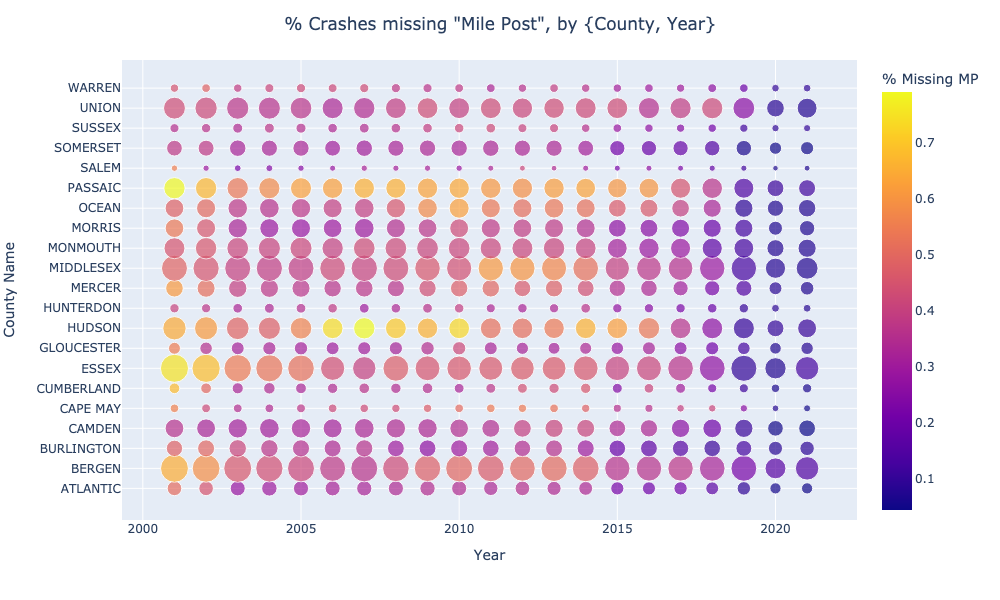

In [22]:
fig = px.scatter(
    mmp,
    x='Year',
    y='County Name',
    size='# Crashes',
    color='% Missing MP',
).update_layout(
    title=dict(
        text="% Crashes missing \"Mile Post\", by {County, Year}",
        x=0.5,
    ),
)

show(fig)

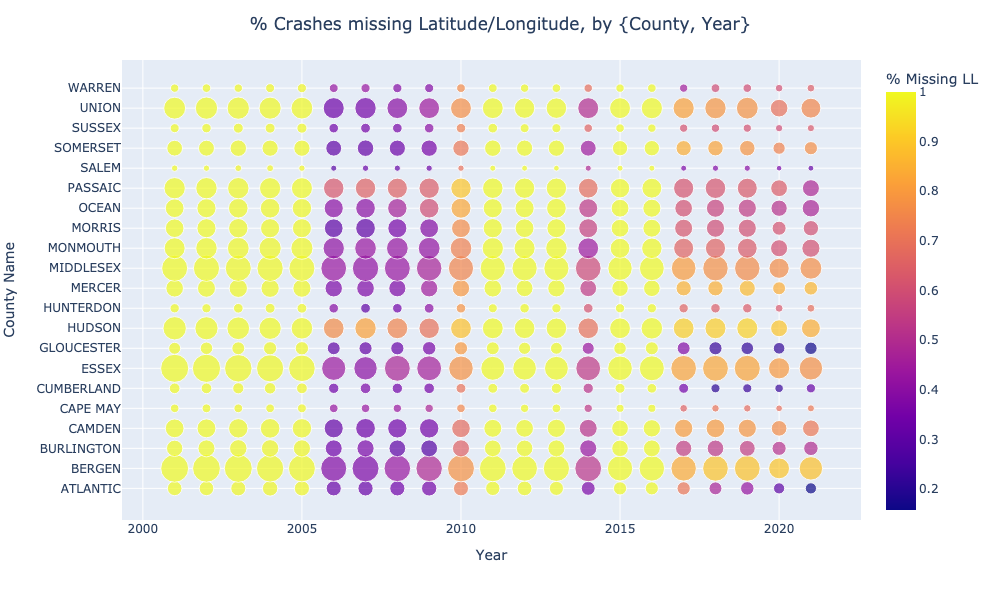

In [23]:
fig = px.scatter(
    mll,
    x='Year',
    y='County Name',
    size='# Crashes',
    color='% Missing LL',
).update_layout(
    title=dict(
        text="% Crashes missing Latitude/Longitude, by {County, Year}",
        x=0.5,
    ),
)

show(fig)

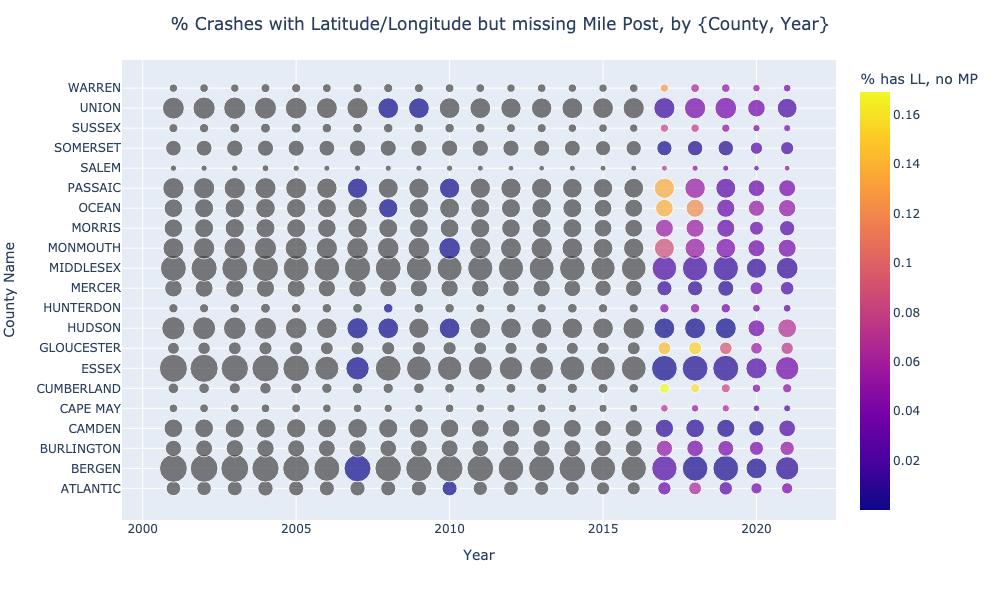

In [24]:
fig = px.scatter(
    ll_no_mp.replace(0, nan),
    x='Year',
    y='County Name',
    size='# Crashes',
    color='% has LL, no MP',
).update_layout(
    title=dict(
        text="% Crashes with Latitude/Longitude but missing Mile Post, by {County, Year}",
        x=0.5,
    ),
)

show(fig)

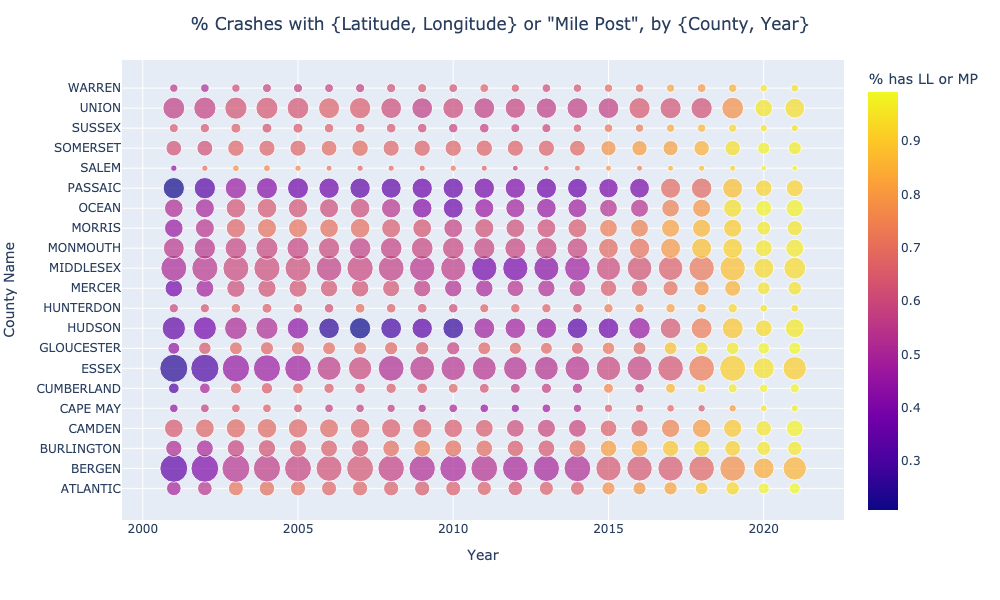

In [25]:
fig = px.scatter(
    ll_or_mp,
    x='Year',
    y='County Name',
    size='# Crashes',
    color='% has LL or MP',
).update_layout(
    title=dict(
        text='% Crashes with {Latitude, Longitude} or "Mile Post", by {County, Year}',
        x=0.5,
    ),
)

show(fig)

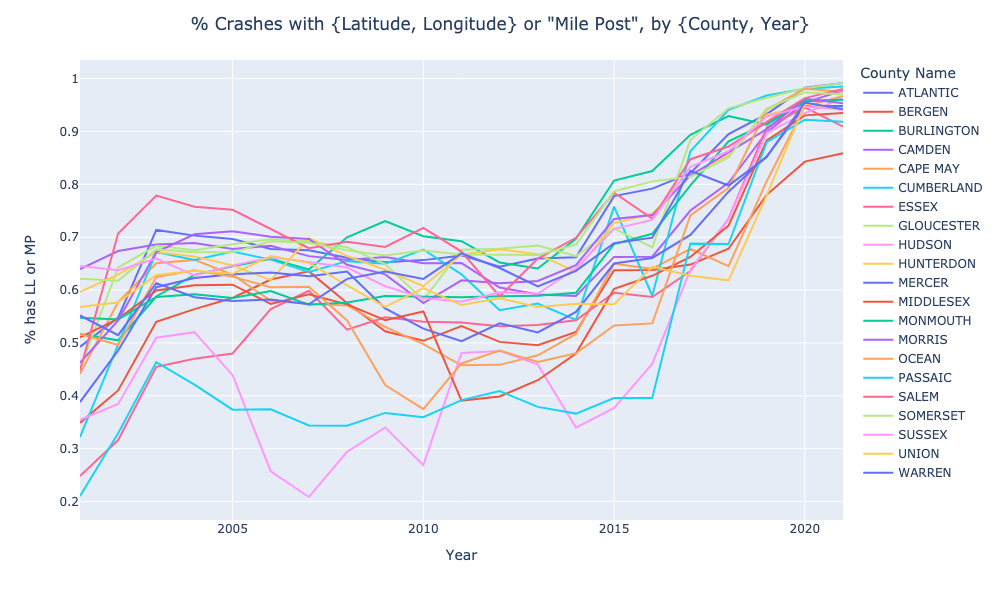

In [26]:
fig = px.line(
    ll_or_mp,
    x='Year',
    y='% has LL or MP',
    color='County Name',
).update_layout(
    hovermode='x',
    title=dict(
        text='% Crashes with {Latitude, Longitude} or "Mile Post", by {County, Year}',
        x=0.5,
    ),
).update_traces(
    hovertemplate="%{y:.0%}",
)

show(fig)